In [38]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [39]:
df=pd.read_csv('first.csv')

In [40]:
df.columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31',
       'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41',
       'C42'],
      dtype='object')

<AxesSubplot:>

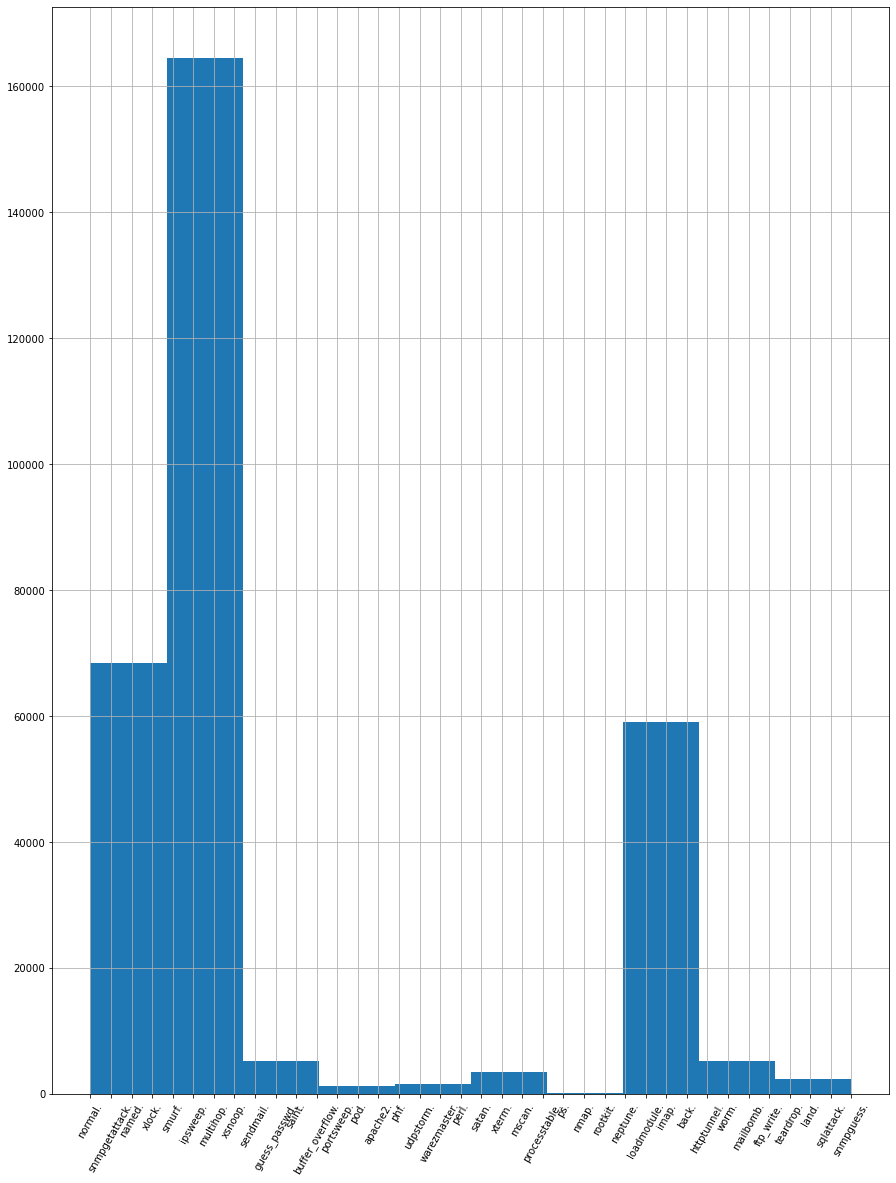

In [41]:
fig = plt.figure(figsize = (15,20))
plt.xticks(rotation = 60)
ax = fig.gca()
df['C42'].hist()

In [44]:
print(df['C42'].unique())
print(len(df['C42'].unique()))

['normal.' 'snmpgetattack.' 'named.' 'xlock.' 'smurf.' 'ipsweep.'
 'multihop.' 'xsnoop.' 'sendmail.' 'guess_passwd.' 'saint.'
 'buffer_overflow.' 'portsweep.' 'pod.' 'apache2.' 'phf.' 'udpstorm.'
 'warezmaster.' 'perl.' 'satan.' 'xterm.' 'mscan.' 'processtable.' 'ps.'
 'nmap.' 'rootkit.' 'neptune.' 'loadmodule.' 'imap.' 'back.' 'httptunnel.'
 'worm.' 'mailbomb.' 'ftp_write.' 'teardrop.' 'land.' 'sqlattack.'
 'snmpguess.']
38


In [6]:
df=df[(df['C42']=='normal.') | (df['C42']=='smurf.')]
df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,normal.
6,0,udp,domain_u,SF,29,0,0,0,0,0,...,3,0.30,0.30,0.3,0.0,0.0,0.0,0.0,0.0,normal.
7,0,udp,private,SF,105,146,0,0,0,0,...,253,0.99,0.01,0.0,0.0,0.0,0.0,0.0,0.0,normal.


<AxesSubplot:>

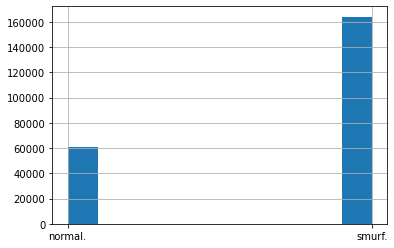

In [7]:
df['C42'].hist()

In [8]:
16000/(16000+6000)
#results if the model does not train and guesses majority case

0.7272727272727273

In [9]:
data=df.values
data.shape

(224684, 42)

In [10]:
data[:,0]

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [11]:
#encoding data to be numerical values
le=[None]*42
for i in range(42):
    print(i,end=' | ')
    le[i] = LabelEncoder()
    le[i].fit(data[:,i])
    data[:,i]=le[i].transform(data[:,i])

0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 40 | 41 | 

In [12]:
data=data.astype('int')

In [13]:
#creating data both for training and testing
X_train,X_test,y_train,y_test=train_test_split(data[:,:41],data[:,41],test_size=0.2, random_state=42)

In [14]:
#training and testing the data
t=tree.DecisionTreeClassifier()
t.fit(X_train,y_train)
res=t.predict(X_test)

In [15]:
sum(res==y_test)/len(y_test)*100

99.997774662305

In [16]:
res==y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [17]:
precision_score(res,y_test)

1.0

In [18]:
recall_score(res,y_test)

0.999969474037669

In [19]:
f1_score(res,y_test)

0.9999847367858723

In [28]:
confusion_matrix(res, y_test)

array([[12179,     0],
       [    0, 32758]], dtype=int64)

In [29]:
clf = RandomForestClassifier(max_depth=100, random_state=10)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, random_state=10)

In [30]:
res=clf.predict(X_test)

In [31]:
sum(res==y_test)/len(y_test)*100

100.0

In [32]:
precision_score(res,y_test)

1.0

In [33]:
recall_score(res,y_test)

1.0

In [34]:
f1_score(res,y_test)

1.0

In [35]:
confusion_matrix(res, y_test)

array([[12179,     0],
       [    0, 32758]], dtype=int64)